In [1]:
import time
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim

from Net import double 
from Mydataset import MyDataSet, ValDataSet

In [10]:
    test_transform = transforms.Compose(
            [transforms.Resize((32,32)),
           transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))])
    val_set = ValDataSet(test_transform)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    device = "cpu"
    print(device)
    net = double()
    net = net.to(device)
    #net.load_state_dict(torch.load("weight/test.pth"))#classificate.pth
    net.load_state_dict(torch.load("weight/classificate.pth"))#classificate.pth


cpu


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [15]:
out = []
lab = []
with torch.no_grad():
    for data in val_loader:
            img1, img2, labels = data
            img1 = img1.to(device)
            img2 = img2.to(device)
            labels = labels.reshape(-1,1)
            labels = labels.to(device)

            outputs = net(img1, img2)
            _, preds = torch.max(outputs, 1)

            out += list(preds)
            lab += list(labels)

            #test_loss = criterion(outputs, labels)
            #total_test_loss[0] += test_loss.item()
            #total_test_loss[1] += 1

In [16]:
    src_transform = transforms.Compose(
            [transforms.Resize((32,32)),
           transforms.ToTensor()])
    src_set = ValDataSet(src_transform)
    src_loader = torch.utils.data.DataLoader(src_set, batch_size=32, shuffle=False)

pred tensor(3)
GT tensor([2])


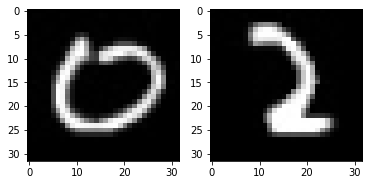

In [26]:
import os 
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
import matplotlib.pyplot as plt
ki = 102
plt.subplot(1,2,1)
plt.imshow(src_set[ki][0][0])
plt.subplot(1,2,2)
plt.imshow(src_set[ki][1][0])
print("pred",out[ki])
print("GT",lab[ki])
plt.gray()
plt.show()

###### print(*outputs)

In [27]:
from sklearn.metrics import accuracy_score as acc
acc(out, lab)

0.18

In [28]:
for i in range(20):
    print(out[i], lab[i])

tensor(0) tensor([0])
tensor(2) tensor([1])
tensor(2) tensor([2])
tensor(7) tensor([3])
tensor(12) tensor([4])
tensor(1) tensor([5])
tensor(5) tensor([6])
tensor(7) tensor([7])
tensor(7) tensor([8])
tensor(11) tensor([9])
tensor(3) tensor([1])
tensor(10) tensor([2])
tensor(8) tensor([3])
tensor(10) tensor([4])
tensor(10) tensor([5])
tensor(3) tensor([6])
tensor(11) tensor([7])
tensor(7) tensor([8])
tensor(10) tensor([9])
tensor(10) tensor([10])
